In [1]:
import matplotlib.pyplot as plt
plt.style.use('rcparams.mplstyle')
import matplotlib as mpl
from matplotlib.backends.backend_pgf import FigureCanvasPgf
mpl.backend_bases.register_backend('pdf', FigureCanvasPgf)
import numpy as np
import os
import pickle
from interpolating_match import find_min_max

This is again far from finished/cleaned up.

In [12]:
# Load data and get min max lines
with open(os.path.join('..', 'EccentricBinaries', 'notebooks', 'grid_data', 'dataslot_21', 'all_matches'), 'rb') as fp:
        grid_data_20_30_5 = pickle.load(fp)
grid_data_20_30_5 = find_min_max(grid_data_20_30_5)
param_vals=grid_data_20_30_5[next(iter(grid_data_20_30_5))]['e_vals']

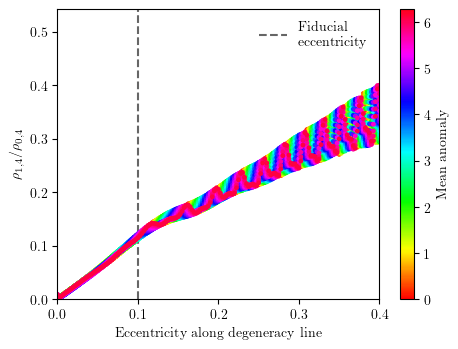

In [17]:
# Plot individual points
plt.figure(figsize=(0.75*6.4,0.75*4.8))
MA_points = len(grid_data_20_30_5[30]['h1_h0'].T)
for i, MA_line in enumerate(grid_data_20_30_5[30]['h1_h0'].T):
    plt.scatter(param_vals, MA_line, c=np.full(len(MA_line), i*2*np.pi/MA_points), cmap='hsv', vmin=0, vmax=2*np.pi, s=6)
plt.colorbar(label='Mean anomaly')
plt.xlim(0, 0.4)
plt.ylim(0,)
ylims = plt.gca().get_ylim()
plt.axvline(0.1, c='k', ls='dashed', alpha=0.6, label='Fiducial\neccentricity', zorder=-5)
plt.legend(frameon=False)
plt.xlabel('Eccentricity along degeneracy line')
plt.ylabel(r'$\rho_{1,4} / \rho_{0,4}$')
plt.tight_layout()
# plt.savefig('Figures/min_max_points.png', dpi=1000)

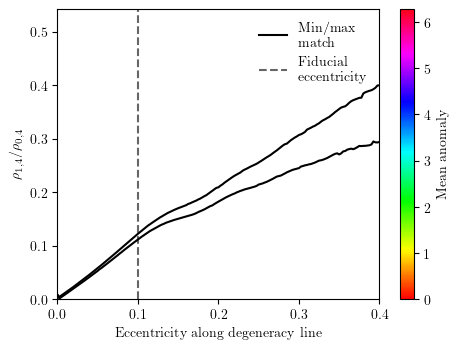

In [18]:
# Plot min/max lines
plt.figure(figsize=(0.75*6.4,0.75*4.8))
MA_points = len(grid_data_20_30_5[30]['h1_h0'].T)
for i, MA_line in enumerate(grid_data_20_30_5[30]['h1_h0'].T):
    plt.scatter(param_vals, MA_line+1, c=np.full(len(MA_line), i*2*np.pi/MA_points), cmap='hsv', vmin=0, vmax=2*np.pi, s=6)
plt.plot(param_vals, grid_data_20_30_5[30]['h1_h0_max'], c='k', label='Min/max\nmatch')
plt.plot(param_vals, grid_data_20_30_5[30]['h1_h0_min'], c='k')
plt.colorbar(label='Mean anomaly')
plt.xlim(0, 0.4)
plt.ylim(ylims)
plt.axvline(0.1, c='k', ls='dashed', alpha=0.6, label='Fiducial\neccentricity', zorder=-5)
plt.legend(frameon=False)
plt.xlabel('Eccentricity along degeneracy line')
plt.ylabel(r'$\rho_{1,4} / \rho_{0,4}$')
plt.tight_layout()
# plt.savefig('Figures/min_max_lines.png', dpi=1000)

Now plot min max lines for set of effective chirp masses

In [29]:
def min_max_plot(data, fid_e=0.1, upper_e=0.4):

    # Plot setup
    plt.figure(figsize=(0.75*6.4, 0.75*4.8))
    n = len(data.keys())
    cmap = mpl.colormaps['inferno']
    
    # Loop over each chirp mass grid
    for i, chirp in enumerate(data.keys()):

        # Get param vals from data
        param_vals = data[chirp]['e_vals']
        upper_e_cond = np.array(param_vals<=upper_e)

        # Plotting min/max amplitude of matches along degen line
        plt.plot(param_vals[upper_e_cond], data[chirp]['h1_h0_max'][upper_e_cond], label='$\mathcal{M}_\mathrm{ecc}=$'+str(chirp)+'$M_\odot$', c=cmap(i/n), alpha=0.7, zorder=5)
        plt.plot(param_vals[upper_e_cond], data[chirp]['h1_h0_min'][upper_e_cond], c=cmap(i/n), alpha=0.7, zorder=5)

    # Plot formatting
    plt.axvline(fid_e, c='k', ls='dashed', zorder=1, alpha=0.7)
    ylim = plt.gca().get_ylim()
    plt.axhline(1, c='k', ls='dashed', zorder=1, alpha=0.7)
    plt.ylim(0, ylim[1])
    plt.xlabel('Eccentricity along degeneracy line')
    plt.ylabel(r'$\rho_{1,4}/\rho_{0,4}$')
    plt.legend(loc='upper left', bbox_to_anchor=(0,1), fancybox=False, framealpha=1, borderaxespad=0, edgecolor='k')
    plt.xlim(param_vals[upper_e_cond][0], param_vals[upper_e_cond][-1])

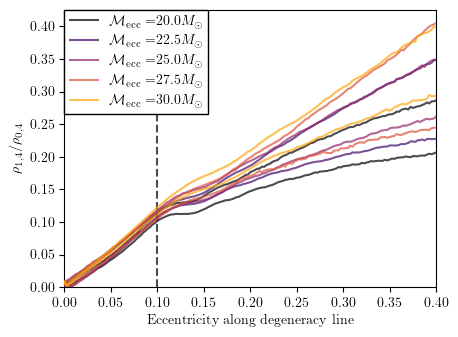

In [30]:
min_max_plot(grid_data_20_30_5, upper_e=0.4)
plt.savefig('Figures/min_max_lines.pgf')